In [1]:
import glob
import re
import xarray as xr
import numpy as np
import pandas as pd
import pickle
import seaborn as sns
import matplotlib.pyplot as plt


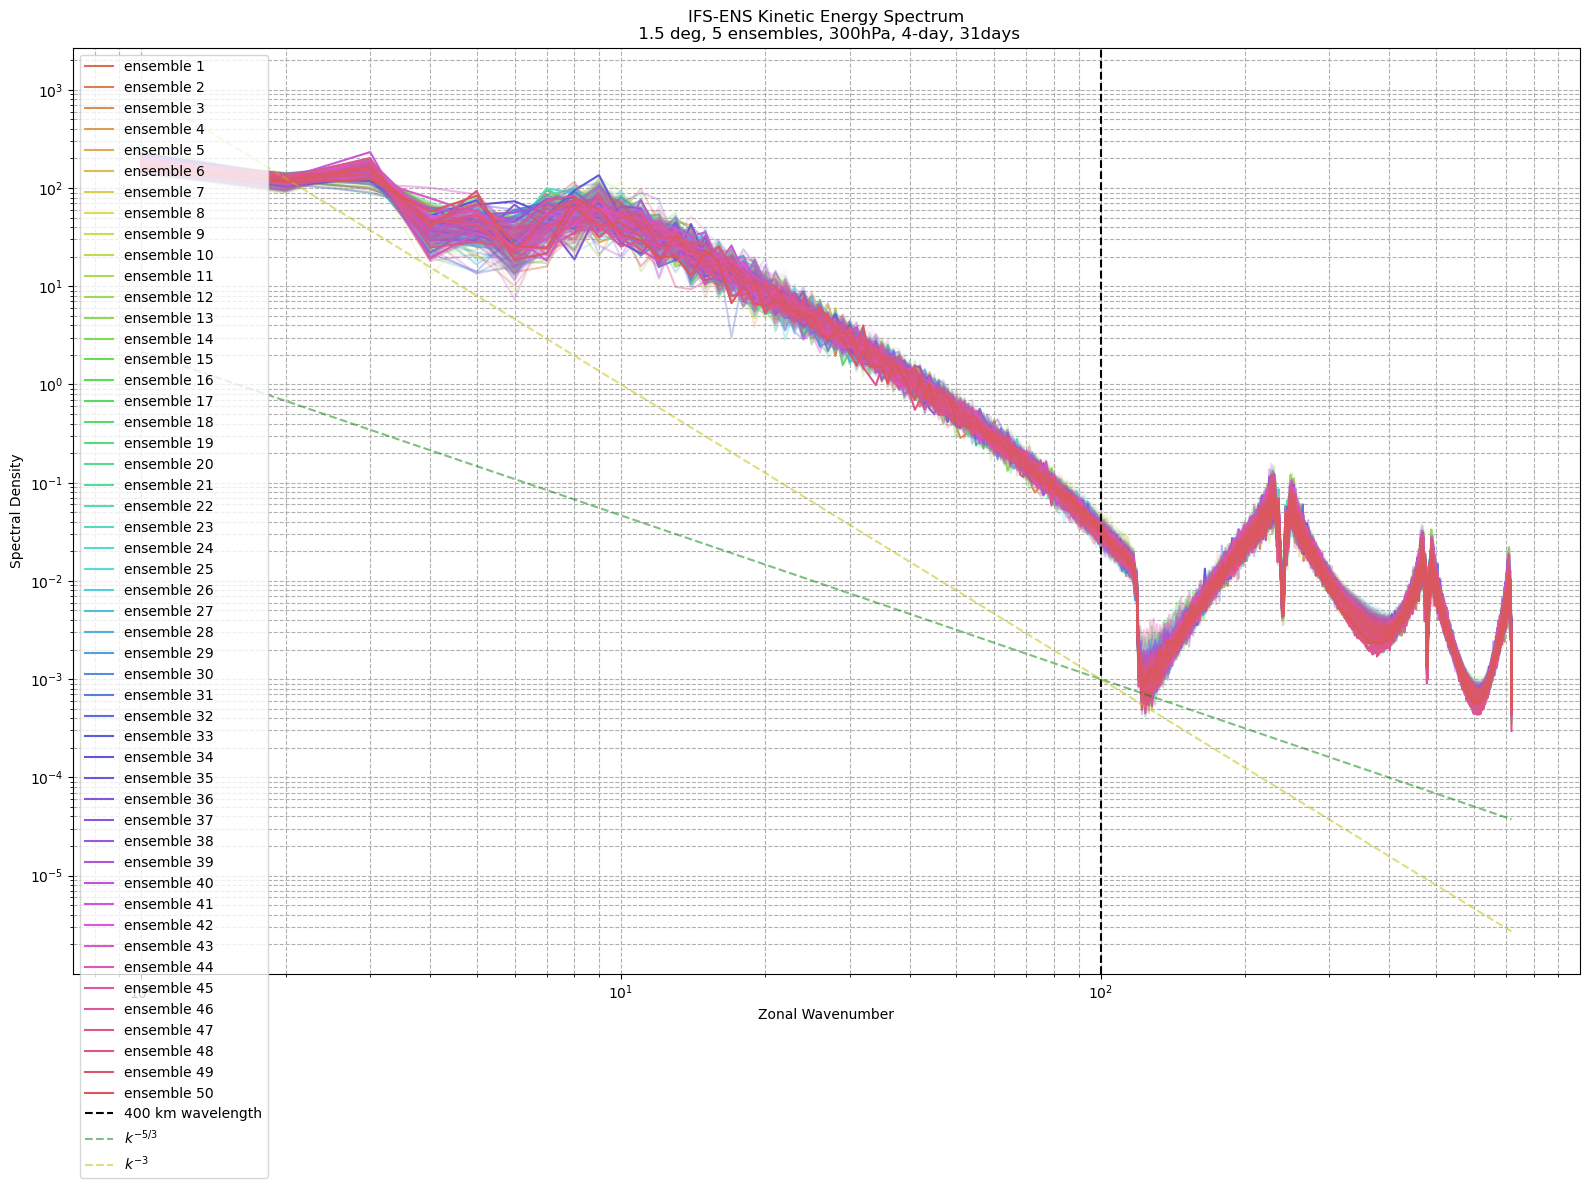

In [68]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import xarray as xr

plt.figure(figsize=(16, 12))



colors = sns.color_palette('viridis', 43)
models = sns.color_palette("hls", 51)

###################
# all ensembles
###################
for i in range(1,51):
    data = xr.open_dataset(f"/data/GC_output/analysis/NWP/IFS-ENS/spectra_2021-06-21_{i}.nc")
    x = data['wavenumber']
    for t in range(0, 31, 5):
        spc = data['spectrum'].isel(level=5, time=t)
        if t == 30:
            plt.loglog(x[1:], spc[1:], color=models[i], alpha=1, label=f'ensemble {i}')
        else:
            plt.loglog(x[1:], spc[1:], color=models[i], alpha=t/60)

##################
# 0th ensemble
##################
# data = xr.open_dataset(f"/geodata2/Gencast/output/ens_2021-06-21/0_spectra.nc")
# for t in range(0,60, 2):
#     x = data['wavenumber']
#     spc = data['spectrum'].isel(level=5, time=t)
#     if t == 58:
#         plt.loglog(x[1:], spc[1:], color=colors[t])
#     else:
#         plt.loglog(x[1:], spc[1:], color=colors[t])
        
##################
# IFS-HRES
##################
# data = xr.open_dataset(f"/data/GC_output/analysis/NWP/spectra_IFS_HRES_2021-06-21T1200.nc")
# for t in range(1, 41, 4):
#     x = data['wavenumber']
#     spc = data['spectrum'].isel(time=t)
#     if t == 58:
#         plt.loglog(x[1:], spc[1:], color=colors[t])
#     else:
#         plt.loglog(x[1:], spc[1:], color=colors[t])

# 1. 400km 파장에 해당하는 wavenumber에 수직선 추가
# zonal wavenumber index at wavelength 400km

# k = 2 * pi * circumference / wavelength
k_400 = 2*np.pi * 6371229/400000


plt.axvline(x=k_400, color='k', linestyle='--', label='400 km wavelength')

# 2. k^{-5/3} 및 k^{-3} 추세선 (붉은색 점선) 추가
#    먼저, 데이터와 같은 x범위를 갖도록 k 값 배열을 생성합니다.
#    x[1:]에서 최소, 최대 값을 추출합니다.
k_min = x[1].item()
k_max = x[-1].item()
k_vals = np.logspace(np.log10(k_min), np.log10(k_max), 100)

# 기준점을 400km (k_400)에서 y값 y_ref로 맞추어 평행이동합니다.
# y축 범위가 약 1e2 ~ 1e-10이므로, 기하평균 1e-4 정도를 기준값으로 선택
y_ref = 1e-3

# k^{-5/3} 추세선을 (k_400, y_ref)를 지나도록 상수 A_5_3 결정:
A_5_3 = y_ref / (k_400 ** (-5/3))
trend_5_3 = A_5_3 * k_vals ** (-5/3)

# k^{-3} 추세선도 (k_400, y_ref)를 지나도록 상수 A_3 결정:
A_3 = y_ref / (k_400 ** (-3))
trend_3 = A_3 * k_vals ** (-3)

# 두 추세선을 붉은색 점선으로 그리기
plt.loglog(k_vals[:], trend_5_3[:], 'g--', label=r'$k^{-5/3}$', alpha=0.5)
plt.loglog(k_vals[:], trend_3[:], 'y--', label=r'$k^{-3}$', alpha=0.5)

plt.xlabel('Zonal Wavenumber')
plt.ylabel('Spectral Density')
plt.title('IFS-ENS Kinetic Energy Spectrum\n 1.5 deg, 5 ensembles, 300hPa, 4-day, 31days')
plt.legend()
plt.grid(True, which='both', ls='--')
plt.tight_layout()
plt.show()
# plt.savefig("low res ens IFS-ENS_KE.png")


In [55]:
xr.open_dataset(f"/data/GC_output/analysis/NWP/IFS-ENS/spectra_2021-06-21_22.nc")

<xarray.Dataset> Size: 2MB
Dimensions:   (time: 31, level: 10, wavenumber: 720)
Dimensions without coordinates: time, level, wavenumber
Data variables:
    spectrum  (time, level, wavenumber) float64 2MB ...